In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
                

In [ ]:
import numpy as np
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data=np.column_stack((fish_length,fish_weight))

In [ ]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))
# print(fish_target)

In [ ]:
from sklearn.model_selection import train_test_split
tra_in,test_in,tra_tar,test_tar=train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)
print(test_tar)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(tra_in,tra_tar)
kn.score(test_in,test_tar)

1.0

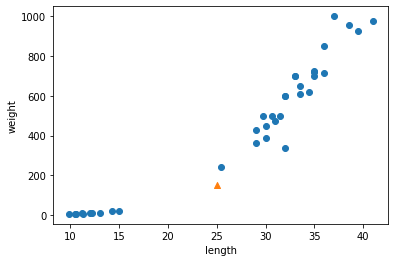

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(tra_in[:,0],tra_in[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

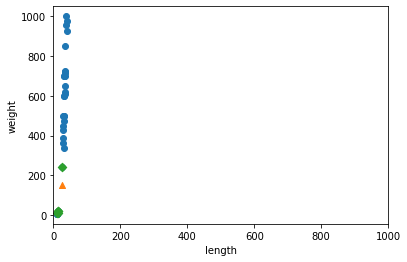

In [ ]:
distances, indexes=kn.kneighbors([[25,150]])
plt.scatter(tra_in[:,0],tra_in[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(tra_in[indexes,0],tra_in[indexes,1],marker='D')
plt.xlim((0,1000))#x축을 y축과 같은 스케일로 보이게 변환
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[1.]


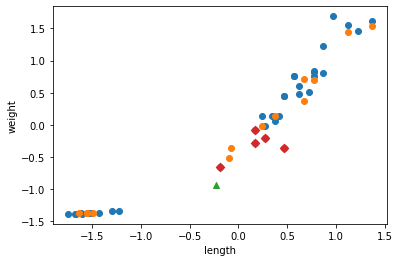

[array([-0.23012627, -0.94060693])]


In [ ]:
mean=np.mean(tra_in,axis=0)
std=np.std(tra_in,axis=0)

new=([25,150]-mean)/std
kn.fit(train_scaled,tra_tar)
train_scaled=(tra_in-mean)/std
test_scaled=(test_in-mean)/std
distances, indexes=kn.kneighbors([new])
print(kn.predict([new]))
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(test_scaled[:,0],test_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
# plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print([new])